In [40]:
import rust as rs
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')

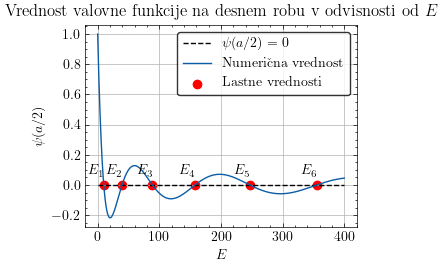

In [41]:


import scipy.optimize as opt
import scipy.interpolate as interp

n = 1000
k_s = np.linspace(0, 20, n)
t = np.linspace(0, 1, n)

solutions = np.ones_like(k_s)
for i, k in enumerate(k_s):
    # f = lambda x, t: schrodinger(x, k)
    x = rs.sch_rk4(k**2, [0., 1.], t)
    solutions[i] = x[-1][0]

zero_crossings = np.where(np.diff(np.sign(solutions)))[0]
k_zeros = np.array([opt.brentq(lambda k: interp.interp1d(k_s, solutions)(k), k_s[i], k_s[i+1]) for i in zero_crossings])


plt.hlines(0, 0, 20**2, linestyles='dashed', colors='black', label='$\\psi(a/2) = 0$')
plt.plot(k_s**2, solutions, label='Numerična vrednost')

plt.grid()
plt.xlabel('$E$')
plt.ylabel('$\\psi(a/2)$')
plt.title('Vrednost valovne funkcije na desnem robu v odvisnosti od $E$')
plt.scatter(k_zeros**2, np.zeros_like(k_zeros), color='red', label='Lastne vrednosti')
for i, k in enumerate(k_zeros):
    label = '$E_{' + str(i+1) + '}$'
    plt.text(k**2 - 0.1, 0.05, label,  verticalalignment='bottom', horizontalalignment='right')

plt.legend(
    facecolor="white",    # background color
    edgecolor="black",    # border color
    framealpha=0.8,       # transparency (1 is opaque)
    frameon=True          # ensure the frame is drawn
)
plt.show()




 0: z =    1.000e0, error =   2.876e-6
 1: z =    1.000e0, error =   1.438e-6
 0: z =    1.000e0, error =  -1.310e-6
 1: z =    1.000e0, error =  -6.549e-7
 0: z =    1.000e0, error =   7.913e-7
 1: z =    1.000e0, error =   3.956e-7
 0: z =    1.000e0, error =  -5.340e-7
 1: z =    1.000e0, error =  -2.670e-7
 0: z =    1.000e0, error =   3.809e-7
 1: z =    1.000e0, error =   1.904e-7


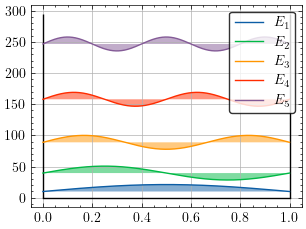

In [42]:
plt.plot(np.linspace(0,1), [0]*50, c='black')
plt.vlines([0,1], 0, 295, colors='black')
scale = 70

for i, k in enumerate(k_zeros[:-1]):
    sol = np.array(rs.shooter(0, 0, 1, 0.5, t, 1e-5, k**2, False, False))[:,0]
    plt.plot(t, (1+i)*scale*sol + k**2, c=f'C{i}', label='$E_{' + str(i+1) + '}$')
    plt.fill_between(t, k**2, (1+i)*scale*sol + k**2, alpha=0.5)

plt.grid()
plt.legend(
    facecolor="white",    # background color
    edgecolor="black",    # border color
    framealpha=0.8,       # transparency (1 is opaque)
    frameon=True          # ensure the frame is drawn
)
plt.show()


 0: z =    1.000e0, error =   2.876e-6
 1: z =    1.000e0, error =   1.438e-6
 0: z =    1.000e0, error =  -1.310e-6
 1: z =    1.000e0, error =  -6.549e-7
 0: z =    1.000e0, error =   7.913e-7
 1: z =    1.000e0, error =   3.956e-7
 0: z =    1.000e0, error =  -5.340e-7
 1: z =    1.000e0, error =  -2.670e-7


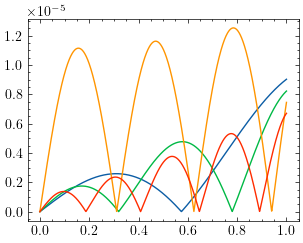

In [ ]:
def analytic_infinite_well(x, n):
    return np.sin(n * np.pi * x)


for i, k in enumerate(k_zeros[:4]):
    analytic = analytic_infinite_well(t, i+1)
    sol = np.array(rs.shooter(0, 0, 1, 0.5, t, 1e-5, k**2, False, False))[:,0]
    sol = sol / np.max(np.abs(sol))
    plt.plot(t, np.abs(sol - analytic), label=f'Absolutna napaka $E_{{{i+1}}}$')
    # plt.plot(analytic)
    # plt.plot(sol)

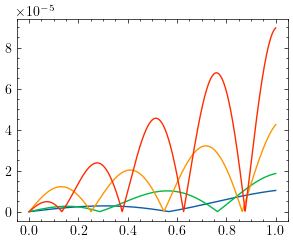

In [44]:
from bvp import fd

def fdv(t, e):
    n = len(t)
    return rs.fd([0]*n, [-e]*n, [0]*n, t, 0, 1e-16)
    # return fd(0, -e, 0, t, 0, 1e-4)

for i in range(4):
    analytic = analytic_infinite_well(t, i+1)
    sol = np.array(fdv(t, k_zeros[i]**2))
    if sol[0] > sol[1]:
        sol = -sol
    sol = sol / np.max(np.abs(sol))
    plt.plot(t, np.abs(sol - analytic), label=f'Absolutna napaka $E_{{{i+1}}}$')


In [ ]:
from timeit import timeit

sh_err = []
sh_tim = []
fd_err = []
fd_tim = []
for n in range(10,100):
    t = np.linspace(0, 1, n)
    ts = timeit(lambda: rs.shooter(0, 0, 1, 0.5, t, 1e-5, k_zeros[1]**2, False, False), number=3)
    sh_tim.append(ts)
    ts = timeit(lambda: fdv(t, k_zeros[1]**2), number=3)
    fd_tim.append(ts)
    sol = np.array(fdv(t, k_zeros[1]**2))
    if sol[0] > sol[1]:
        sol = -sol
    sol = sol / np.max(np.abs(sol))
    es = np.max(np.abs(analytic_infinite_well(t, 2) - sol))
    fd_err.append(es)
    sol = np.array(rs.shooter(0, 0, 1, 0.5, t, 1e-5, k**2, False, False))[:,0]
    sol = sol / np.max(np.abs(sol))
    es = np.max(np.abs(analytic_infinite_well(t, 2) - sol))
    fd_err.append(es)



 0: z =    1.000e0, error =    0.000e0
 1: z =    1.000e0, error =    0.000e0
 0: z =    1.000e0, error =    0.000e0
 1: z =    1.000e0, error =    0.000e0
 0: z =    1.000e0, error =    0.000e0
 1: z =    1.000e0, error =    0.000e0



thread '<unnamed>' panicked at src/fn08.rs:254:21:
index out of bounds: the len is 1 but the index is 1
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: index out of bounds: the len is 1 but the index is 1

In [ ]:
plt.plot(sh_err)
plt.plot(fd_err)
plt.yscale('log')
plt.show()